In [2]:
from landlab.components.genveg.species import Species
import numpy as np
from landlab import RasterModelGrid
rng = np.random.default_rng()


In [7]:
def example_input_params():
    param_dict = {
        "BTS": {
            "col_params": {"prob_colonization": 0.01, "time_to_colonization": 365},
            "dispersal_params": {
                "max_dist_dispersal": 0.4,
                "min_size_dispersal": 0.5,
                "unit_cost_dispersal": 1.2,
            },
            "duration_params": {
                "growing_season_end": 305,
                "growing_season_start": 144,
                "max_age": 1000,
                "peak_biomass": 227,
                "reproduction_end": 250,
                "reproduction_start": 180,
                "senescence_start": 273,
            },
            "grow_params": {
                "glucose_requirement": {
                    "leaf": 1.463,
                    "reproductive": 1.414,
                    "root": 1.444,
                    "stem": 1.513,
                },
                "growth_max_biomass": 13.899999999999999,
                "growth_min_biomass": 0.06222222222222222,
                "incremental_nsc": {
                    "leaf": [1.25, 0, -1, 0.5],
                    "reproductive": [1.5625, -1.875, 0.0625, 2.5],
                    "root": [1.25, -2.5, 0, 2],
                    "stem": [0, -0.5, 0, 0.5],
                },
                "max_nsc_content": {
                    "leaf": 0.36629,
                    "reproductive": 0.36643,
                    "root": 0.36643,
                    "stem": 0.30964,
                },
                "min_nsc_content": {
                    "leaf": 0.01548,
                    "reproductive": 0.01071,
                    "root": 0.01071,
                    "stem": 0.0075,
                },
                "nsc_content": {
                    "leaf": 0.2096344,
                    "reproductive": 0.2369178,
                    "root": 0.2369178,
                    "stem": 0.10,
                },
                "plant_part_max": {
                    "leaf": 5.5,
                    "reproductive": 4,
                    "root": 4.3,
                    "stem": 4.1,
                },
                "plant_part_min": {
                    "leaf": 0.03,
                    "reproductive": 0,
                    "root": 0.01,
                    "stem": 0.022222222222222223,
                },
                "respiration_coefficient": {
                    "leaf": 0.03,
                    "reproductive": 0.01,
                    "root": 0.015,
                    "stem": 0.015,
                },
                "root_to_leaf": {"a": 0.031, "b1": 0.951, "b2": 0},
                "root_to_stem": {"a": -0.107, "b1": 1.098, "b2": 0.0216},
                "total_max_biomass": 17.9,
                "total_min_biomass": 0.06222222222222222,
            },
            "morph_params": {
                "allometry_method": "min-max",
                "basal_coeffs": {
                    "a": -9999,
                    "b": -9999,
                },
                "biomass_decay_rate": {
                    "dead_leaf": 0.07,
                    "dead_reproductive": 0.07,
                    "dead_root": 0.07,
                    "dead_stem": 0.07,
                },
                "canopy_coeffs": {
                    "a": -9999,
                    "b": -9999,
                    "c": -9999,
                },
                "height_coeffs": {
                    "a": -9999,
                    "b": -9999,
                },
                "lai_cr": 4,
                "max_height": 0.75,
                "max_n_stems": 10,
                "max_plant_density": 18,
                "max_root_sys_depth": 0.33,
                "max_root_sys_width": 0.35,
                "max_shoot_sys_width": 0.3,
                "max_basal_dia": 0.1,
                "min_height": 0.075,
                "min_root_sys_depth": 0.02,
                "min_root_sys_width": 0.01,
                "min_shoot_sys_width": 0.01,
                "min_basal_dia": 0.005423267786434878,
                "sp_leaf_area": 0.0074,
            },
             "mortality_params": {
                "coeffs": {
                    "1": [9837.624573797346, 0.20082011968400607], # still need to find
                },
                "duration": {1: 207},
                "mort_variable_name": {
                    "1": "temp-range",
                },
                "period": {
                    "1": "during growing season",
                },
                "predictor": {
                    "1": [8.62, 10.35, 12.08, 13.80, 15.53], 
                },
                "response": {
                    "1": [0.01, 0.25, 0.67, 0.85, 0.99],
                },
            },
            "photo_params": {
                "ci": 65,
                "co": 209,
                "kc": 21,
                "ko": 650,
                "spec_factor_25": 120,
                "stomatal_conductance": 0.2,
                "vcmax": 20,
            },
            "plant_factors": {
                "angio_gymno": "angiosperm",
                "duration": "perennial deciduous",
                "growth_form": "rhizomatous",
                "growth_habit": "graminoid",
                "monocot_dicot": "monocot",
                "p_type": "C3",
                "species": "BTS",
            },
        }
    }
    return param_dict


# test plant array
def example_plant():
    dtypes = [
        ("species", "U10"),
        ("pid", int),
        ("cell_index", int),
        ("x_loc", float),
        ("y_loc", float),
        (("root", "root_biomass"), float),
        (("leaf", "leaf_biomass"), float),
        (("stem", "stem_biomass"), float),
        (("reproductive", "repro_biomass"), float),
        ("dead_root", float),
        ("dead_stem", float),
        ("dead_leaf", float),
        ("dead_reproductive", float),
        ("dead_root_age", float),
        ("dead_leaf_age", float),
        ("dead_stem_age", float),
        ("dead_reproductive_age", float),
        ("shoot_sys_width", float),
        ("basal_width", float),
        ("root_sys_width", float),
        ("shoot_sys_height", float),
        ("root_sys_depth", float),
        ("total_leaf_area", float),
        ("live_leaf_area", float),
        ("plant_age", float),
        ("n_stems", int),
        ("pup_x_loc", float),
        ("pup_y_loc", float),
        ("pup_cost", float),
        ("item_id", int),
    ]
    plants = np.empty(1, dtype=dtypes)
    plantlist = []
    plant = "Corn"
    pidval = 0
    cell_index = 0
    for i in range(1):
        pidval = i
        cell_index = i + 1
        plantlist.append(
            (
                plant,
                pidval,
                cell_index,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0,
                np.nan,
                np.nan,
                np.nan,
                i,
            )
        )
    plants = np.array(plantlist, dtype=dtypes)
    plants["root"] = np.array([0.80000000000000004])
    plants["stem"] = np.array([0.29999999999999999])
    plants["leaf"] = np.array([0.50000000000000000])
    plants["live_leaf_area"] = 0.022 * plants["leaf"]
    plants["shoot_sys_width"] = np.array(
        [(4 * (plants["live_leaf_area"] / 0.012) / np.pi) ** 0.5]
    )
    plants["shoot_sys_height"] = np.array([0.010000000000000000])
    plants["total_leaf_area"] = plants["live_leaf_area"]
    plants["plant_age"] = np.array([90])
    plants["n_stems"] = np.array([1.0])
    return plants

def example_plant_array():
    dtypes = [
        ("species", "U10"),
        ("pid", int),
        ("cell_index", int),
        ("x_loc", float),
        ("y_loc", float),
        (("root", "root_biomass"), float),
        (("leaf", "leaf_biomass"), float),
        (("stem", "stem_biomass"), float),
        (("reproductive", "repro_biomass"), float),
        ("dead_root", float),
        ("dead_stem", float),
        ("dead_leaf", float),
        ("dead_reproductive", float),
        ("dead_root_age", float),
        ("dead_leaf_age", float),
        ("dead_stem_age", float),
        ("dead_reproductive_age", float),
        ("shoot_sys_width", float),
        ("basal_width", float),
        ("root_sys_width", float),
        ("shoot_sys_height", float),
        ("root_sys_depth", float),
        ("total_leaf_area", float),
        ("live_leaf_area", float),
        ("plant_age", float),
        ("n_stems", int),
        ("pup_x_loc", float),
        ("pup_y_loc", float),
        ("pup_cost", float),
        ("item_id", int),
    ]
    plants = np.empty(100, dtype=dtypes)
    plantlist = []
    plant = "Corn"
    pidval = 0
    cell_index = 0
    for i in range(8):
        pidval = i
        cell_index = i + 1
        plantlist.append(
            (
                plant,
                pidval,
                cell_index,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0,
                np.nan,
                np.nan,
                np.nan,
                i,
            )
        )
    plants = np.array(plantlist, dtype=dtypes)
    plants["root"] = np.array([0.05, 0.05, 0.05, 0.05, 7.00, 7.00, 7.00, 7.00])
    plants["stem"] = np.array([0.05, 7.00, 0.05, 7.00, 0.05, 7.00, 0.05, 7.00])
    plants["leaf"] = np.array([0.05, 0.05, 7.00, 7.00, 0.05, 0.05, 7.00, 7.00])
    plants["reproductive"] = np.array([3.5, 3.5, 3.5, 3.5, 3.5, 0.05, 0.05, 0.05])
    plants["dead_root"] = plants["root"] * 0.25
    plants["dead_stem"] = plants["stem"] * 0.25
    plants["dead_leaf"] = plants["leaf"] * 0.25
    plants["dead_root_age"] = np.array([1094.035397, 267.2368885, 382.4262438, 347.6774074, 1017.381215, 911.6529431, 314.3525663, 982.1220087])
    plants["dead_leaf_age"] = np.array([1329.561664, 1352.338509, 1238.787392, 1433.019734, 1348.797247, 735.8478796, 1177.379645, 234.6844825]) 
    plants["dead_stem_age"] = np.array([1315.902291, 1453.913069, 688.1424854, 329.2440673, 1362.62031, 457.1701171, 1377.041709, 1364.471028])
    plants["dead_reproductive_age"] = np.array([507.8777074, 1121.713079, 204.4386012, 1073.25249, 660.3439315, 426.4383309, 1261.53064, 1085.549562])
    plants["dead_reproductive"] = plants["reproductive"] * 0.25
    plants["shoot_sys_width"] = rng.uniform(low=0.1, high=3, size=plants.size)
    plants["basal_width"] = rng.uniform(low=0.05, high=1, size=plants.size)
    plants["root_sys_width"] = rng.uniform(low=0.1, high=1, size=plants.size)
    plants["shoot_sys_height"] = rng.uniform(low=0.2, high=4, size=plants.size)
    plants["root_sys_depth"] = rng.uniform(low=0.0, high=2, size=plants.size)
    plants["total_leaf_area"] = rng.uniform(low=0.1, high=3, size=plants.size)
    plants["live_leaf_area"] = rng.uniform(low=0.1, high=1, size=plants.size)
    plants["plant_age"] = rng.uniform(low=1 / 365, high=5, size=plants.size)
    plants["n_stems"] = rng.integers(1, 6, size=plants.size)
    plants["pup_x_loc"][plants["reproductive"] > 0.1] = 0.0
    plants["pup_y_loc"][plants["reproductive"] > 0.1] = 0.0
    plants["pup_cost"][plants["reproductive"] > 0.1] = 0.75
    plants["item_id"] = np.array([1, 2, 3, 4, 5, 6, 7, 8])
    return plants

def one_cell_grid():
    # Create grid with one cell containing min max temp, par, location, species
    grid = RasterModelGrid((3, 3), 2, xy_of_reference=(-74.08, 39.79))
    grid.axis_units = ("m", "m")
    maxtemp = np.array([15.53])
    mintemp = np.array([8.62])
    NJ_avg_par = np.array([118.11])

    # Initialize with a dummy data sets
    _ = grid.add_field(
        "air__max_temperature_C",
        maxtemp * np.ones(grid.number_of_cells),
        at="cell",
        units="C",
    )
    _ = grid.add_field(
        "air__min_temperature_C",
        mintemp * np.ones(grid.number_of_cells),
        at="cell",
        units="C",
    )
    _ = grid.add_field(
        "radiation__par_tot",
        NJ_avg_par * np.ones(grid.number_of_cells),
        at="cell",
        units="W/m^2",
    )
    _ = grid.add_field(
        "vegetation__plant_species",
        np.full(grid.number_of_cells, "Corn"),
        at="cell",
    )
    return grid


In [60]:
s_class = Species(species_params=example_input_params()["BTS"], latitude=0.9074)

In [61]:
plants = example_plant_array()


In [62]:
plants['cell_index']

array([1, 2, 3, 4, 5, 6, 7, 8])

In [64]:
grid = one_cell_grid()


In [65]:
s_class._grid = grid

In [66]:
s_class.calculate_whole_plant_mortality(plants, True)

KeyError: 'during growing  season'

In [ ]:
one_cell_grid()["cell"]["air__max_temperature_C"]

In [22]:
predictor = example_input_params()["BTS"]["mortality_params"]["predictor"]['1']
response = example_input_params()["BTS"]["mortality_params"]["response"]['1']

In [24]:
X = np.array(predictor).reshape(-1, 1)
X

array([[ 8.62],
       [10.35],
       [12.08],
       [13.8 ],
       [15.53]])

In [16]:
from sklearn import linear_model

In [25]:
y = np.array(response)

In [26]:
logr = linear_model.LogisticRegression()
logr.fit(X, y)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [28]:
X = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88])
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

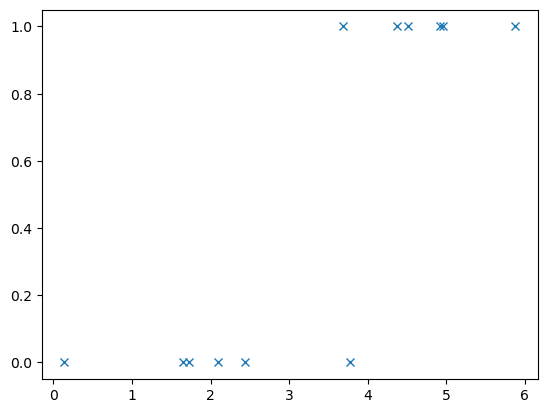

In [31]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'x')
plt.show()

In [33]:
logr = linear_model.LogisticRegression()
logr.fit(X.reshape(-1, 1), y)

LogisticRegression()

In [34]:
logr.coef_

array([[1.39514829]])

In [35]:
from scipy.optimize import curve_fit

In [36]:
def prob_surval (x, a, b):
    return 1 / (1 + a * np.exp(-b * x))


In [45]:
xdata = np.linspace(8.62, 15.53, 50)
ydata = np.linspace(0.001, 0.999, 50)

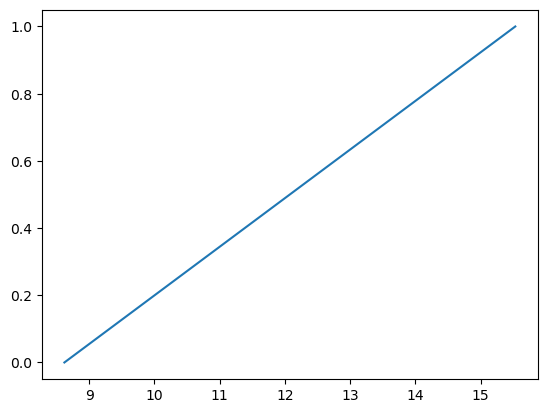

In [44]:
plt.plot(xdata, ydata)
plt.show()

In [46]:
popt, pcov = curve_fit(prob_surval, xdata, ydata)


/var/folders/zj/g34bfct53wg5d37bg7l5s7r80000gp/T/ipykernel_14525/4039272512.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + a * np.exp(-b * x))
/var/folders/zj/g34bfct53wg5d37bg7l5s7r80000gp/T/ipykernel_14525/4039272512.py:2: RuntimeWarning: overflow encountered in multiply
  return 1 / (1 + a * np.exp(-b * x))


In [47]:
popt

array([5.70971684e+03, 7.16349874e-01])

In [7]:
growdict = s_class.species_grow_params
all_parts = s_class.all_parts


In [8]:
new_biomass = epa.copy()

In [9]:
temp_adj = 2 ** ((temp - 25) / 10)
temp_adj    

array([0.40824298])

In [10]:
for part in all_parts:
    delta_respire = np.zeros_like(new_biomass["root"])
    filter = np.nonzero(new_biomass[part] > 0)
    delta_respire[filter] = (
        temp_adj * growdict["respiration_coefficient"][part] * new_biomass[part][filter]
    ) / growdict["glucose_requirement"][part]
    new_biomass[part][filter] -= delta_respire[filter]
    print(f'{part} - new')
    print(new_biomass[part])
    print(f'{part} - old')
    print(epa[part])

leaf - new
[0.04958143 0.04958143 6.94140053 6.94140053 0.04958143 0.04958143
 6.94140053 6.94140053]
leaf - old
[0.05 0.05 7.   7.   0.05 0.05 7.   7.  ]
reproductive - new
[3.48989498 3.48989498 3.48989498 3.48989498 3.48989498 0.04985564
 0.04985564 0.04985564]
reproductive - old
[3.5  3.5  3.5  3.5  3.5  0.05 0.05 0.05]
root - new
[0.04978796 0.04978796 0.04978796 0.04978796 6.97031474 6.97031474
 6.97031474 6.97031474]
root - old
[0.05 0.05 0.05 0.05 7.   7.   7.   7.  ]
stem - new
[0.04979763 6.97166853 0.04979763 6.97166853 0.04979763 6.97166853
 0.04979763 6.97166853]
stem - old
[0.05 7.   0.05 7.   0.05 7.   0.05 7.  ]


In [12]:
growdict["glucose_requirement"]

{'leaf': 1.463, 'reproductive': 1.414, 'root': 1.444, 'stem': 1.513}

In [ ]:
epa_bad_values

In [ ]:
epa_bad_values["dead_root"][0] = -0.0125

In [ ]:
epa_bad_values["dead_root"]

In [ ]:
epa_bad_values["dead_stem"][1] = np.nan

In [ ]:
epa_bad_values["dead_stem"]

In [ ]:
epa_bad_values["dead_leaf"][2] = np.inf

In [ ]:
epa_bad_values["dead_leaf"]

In [ ]:
s_class.litter_decomp(epa_bad_values)

In [ ]:
epa